In [ ]:
## Synchronization of 3 Christoffel Words

# this file will contain instructions on how to use the functions to synchronize Christoffel words of Three generators


#necessary libraries:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

def orbitize(gen,n):
  '''orbitize: we use this function to find orbits of any generator
  input: (generator, n = sum of list of generators)
  output: [a single list called an orbit of a generator]'''
  orbit = list()
  for i in range(0,n+1):
    orbit.append((i*gen)%n) # add elements
  return(orbit)

def christoffelWord(orbit): # takes input orbit vector
  '''christoffelWord: we use this function to find the christoffel words for a following orbit vector
  input: [orbit for a given generator]
  output: [single list called the christoffel word of an orbit]'''

  word = []
  for i in range(0,len(orbit)-1):
    if orbit[i+1]>orbit[i]:
      word.append(0)
    else:
      word.append(1)
  return(word)



In [ ]:
# examples:
# let [1,2,4] be your list of generators:
# to obtain the orbit for generator 4:
#orbitize(4,7)
# [0, 4, 1, 5, 2, 6, 3, 0]
# using that output we find the christoffel word:
#christoffelWord([0, 4, 1, 5, 2, 6, 3, 0])
# [0, 1, 0, 1, 0, 1, 1]

In [ ]:
def matrixGenerator(gens):
  '''matrixGenerator: generates the matrix of Orbits and Words using the generators.
  input: [list of generators]
  output: [list of orbits for each generator, list of christoffel words for each orbit]'''
  n = sum(gens)
  orbits = []

  for gen in gens:
    orbit = orbitize(gen,n)
    orbits.append(orbit)
  words = []
  for orbit in orbits:
    word = christoffelWord(orbit)
    words.append(word)
  return [orbits,words]



In [ ]:
# now using this function we can automate the process of finding the orbits and christoffel words
# for the same list of generators [1,2,4]
#matrixGenerator([1,2,4])
# we get [orbits, words]:
#[ [ [0, 1, 2, 3, 4, 5, 6, 0] , [0, 2, 4, 6, 1, 3, 5, 0], [0, 4, 1,  5, 2, 6, 3, 0] ], [ [0, 0, 0, 0, 0, 0, 1] , [0, 0, 0, 1, 0, 0, 1] , [0, 1, 0, 1, 0, 1, 1] ] ]

In [ ]:

def VI(gens):
  '''# VERTICAL INVARIANT FUNCTION: used to find d'''
  n = sum(gens)
  k = len(gens)
  di = 0

  for i in range(0,k):
    di = di + math.gcd(gens[i],n)
  return ((n*k)/2 - (1/2)*di)

def transpose(xM):
  '''Transpose function: transpose a matrix, list of lists.
  input: a matrix (list of lists of equal lengths)
  output: a transposed matrix'''
  return([[xM[j][i] for j in range(len(xM))] for i in range(len(xM[0]))])

def checkSynchro(xList):
  '''check synchronization function: Synchronized iff all sum of cols == 1
  input: a christoffel word matrix (list of christoffel word lists)
  output: True or False depending on whether that list is synchronized'''
  tList = transpose(xList)
  for line in tList:
    if (sum(line)) != 1:
      return False
  return True

def shift(slist):
  '''shift Function: shifts row by one index
  input: any list
  output: a right shift of the list by one index
  example: input([1,0,0,1,0,0,1]) ----> output([1,1,0,0,1,0,0])'''
  return (slist[-1:] + slist[:len(slist)-1])


def shiftBy(sList,n):
  '''shift by function: shifts list by n index
  input: any list
  output: right shift of the list by n index'''
  return sList[-n:] + sList[:-n]

def allShifts(word):
  '''allShifts:
  input: takes a word of any length
  output: returns all the possible shifts on the word'''
  return [shiftBy(word,i) for i in range (0,len(word))]


def shiftOb(ob,n):
  '''shift Orbit function: function the shifts an orbit by n iterations
  input: an orbit list
  output: a right shifted orbit by n indices'''
  if n >= len(ob):
    n = n - len(ob)
  if n == 0:
    return ob
  first = ob[len(ob)-n-1:len(ob)-1]
  last = ob[:len(ob)-n]
  first.extend(last)
  return first

def checkFit(mat):
  '''check Fitness function: Fit iff all sum of cols == (1 or 0)
  input: christoffel word matrix (or any list of christoffel words)
  output: True or False depending on whether all words fit.'''
  for col in zip(*mat):
    if sum(col) > 1:
      return False
  return True

def findFits(list1,list2):
    '''Find fits function: does it by shifting and checking for fitness at each iteration.
    input: two lists
    output: list of all possible fits between them (how many shifts you apply to list 2 for it to fit with list one)'''
    fits=[]
    mat = [list1, list2]
    for i in range(0,len(list2)):
      if checkFit(mat):
        fits.append(i)
        mat[1] = shift(mat[1])
      else:
        mat[1] = shift(mat[1])
    return(fits)


def merger(list1, list2):
    '''merge function: merge 2 lists by summing columns
    input: 2 lists
    output: lists merged together by summing columns
    example: input([[1,1,1],[0,1,2]]) ----> output([1,2,3])'''
    return [x + y for x, y in zip(list1, list2)]


def syncWord(mat):
  '''syncWord(Synchronized Word function): finding the synchronized Word of a synchronized matrix
  input: christoffel word matrix
  output: synchronized word, Christoffel Conjugate Matrix
  example: input - [[1,0,0],[0,1,0],[0,0,1]] ----> output - [[[1,0,0],[0,2,0],[0,0,3]], [1,2,3]]'''
  finalMat = mat[:]
  for i in range(0,len(mat)):
    finalMat[i] = [i+1 if x == 1 else x for x in finalMat[i]]
  synchronizedWord = finalMat[0]
  for i in range(1,len(mat)):
    synchronizedWord = merger(synchronizedWord,finalMat[i])
  return [finalMat,synchronizedWord]


def indexFinder(orbit,num):
  '''indexFinder : we use this function to find the index of any number in a list.
  this function particularly interests us to find the index of a number in the orbit given the seed
  input:an orbit, a number
  output: the index where that number is found'''
  for i in range(0, len(orbit)):
    if orbit[i]==num:
      return i
  return False

def synchronizedForm(orbit,pos):
  '''synchronizedForm: we use this function to transform the orbits using the relative seed (we will use the position/index of the number) circular permutaionstarting from position pos,
  where pos can be any element of my seed vector
  input: an orbit, an index
  output: a shifted orbit such that we have a circular permutaionstarting from position pos
  example: synchronizedForm([0,2,4,8,1,3,5,0],3) ---> [8, 1, 3, 5, 0, 2, 4, 8]'''
  nl=orbit[pos:] + orbit[1:pos+1]
  return(nl)

# Algorithm 1: Synchronized Seed Function

In [ ]:

def seedFinder(gens):
  '''Seed finder function: finds the seed necessary to synchronize the orbits matrix.
  specifically works for generators of lengths 2 or 3
  input: list of generators
  output: list of seeds for the given set of genertors'''

  generators = gens[:]
  n = sum(gens)
  if len(gens) == 3:
    # Checking all cases for 3 generators:

    #Case 1: 3 identical generators
    if ( gens.count(gens[0]) == len(gens) ):
      return [0,gens[0],2*gens[0]]

    # Case 2: 2 identical generator
    elif ( len(set(gens)) != len(gens) ):
      d = math.gcd(gens[0],gens[2])

      # special case: 1
      if (n/d)%2 == 0:
        return [n-d,(n-2*d)/2,0]

      # special case: 2
      if (n/d)%2 != 0:
        return [n-d,(n-d)/2,0]

      # Subcase1: Sum of generators is even
      if n%2 == 0:
        return [n-1 , (n-2)/2 , 0]

      #Subcase 2: Sum of generators is odd
      else:
        return [n-1, (n-1)/2, 0]

    # Case 3: 3 unique generators.
    elif (gens[0] == gens[1]/2 == gens[2]/4):
      vi = VI(gens)
      return [vi//3,vi//3,vi//3]

    else:
      # Case 4: Do not follow any of the seeds criteria
      return ValueError('cannot be synchronized')
  # Case for 2 generators
  elif len(gens) == 2:
    d = math.gcd(gens[0],n)
    return [0, n-d]

  # if follows non of the conditions
  else:
    return ValueError('Cannot be Synchronized')



In [ ]:
def cleanGens(generators):
  '''cleans list of generators by sorting and removing zeros if they exist'''
  gens = generators[:]
  # fixing order to avoid errors:
  gens = sorted(gens) # sorting ascending
  gens = sorted(gens, key=gens.count, reverse=True)  # sorting key based on count/ reverse so we have (gen1,gen1,gen2) "high count appear first"
  #removing 0 if it exists
  gens = [i for i in gens if i != 0]
  return gens

In [ ]:


def synchronize(gens,seeds):
  '''Synchronize function: uses the seeds to synchronize the Orbit Matrix, and words
  Input: list of generators, list of seeds
  output: synchronized orbit and christoffel words matrix'''

  n = sum(gens)

  orbits = []
  for i in gens:
    orbits.append(orbitize(i,n))

  positions =[]
  for i in range(0,len(orbits)):
    positions.append(indexFinder(orbits[i],seeds[i]))

  newOrbits = []
  for i in range(0,len(orbits)):
    newOrbits.append(synchronizedForm(orbits[i],positions[i]))

  words = []
  for i in newOrbits:
    words.append(christoffelWord(i))

  return [words,newOrbits]



In [ ]:

def synchronizedSeedFunc(generators):
  '''this function only takes list of generators of length 2,3
  it also only accepts generators that follow the seeding criteria
  input: a list of generators
  Output:
    True/False for synchronization
    gens: are the generators in order with respect to the output word
    words: are the synchronized matrix after using the seeds
    synchronizedWord: is one list that consists of the row number of where each '1' exists
    christoffelConjugateMatrix: is the same as the words but instead of having '1's were numbering them by row
    orbits: are the orbits after applying the seeds
    seeds: are the seeds 'first column of the orbits' used to aquire the synchronized words matrix'''

  gens = cleanGens(generators)

  # extracting the divisors and dividing the gens to factorize them
  divs = math.gcd(*gens)
  gens = [g//divs for g in gens]

  #finding seed then synchronizing
  seeds = seedFinder(gens)

  # if the generators dont verify any of the conditions we return false
  if type(seeds) == ValueError:
    return [False,generators,seeds]

  # fixing seeds and generators by multiplying by the divisors
  seeds = [s*divs for s in seeds]
  gens = [int(g*divs) for g in gens]

  # using synchronize to fix orbits using the seeds and extracting the words.
  result = synchronize(gens,seeds)
  words = result[0]
  orbits = result[1]

  # extracting the synchronized word and the christoffelConjugateMatrix
  res = syncWord(words)
  christoffelConjugateMatrix = res[0]
  synchronizedWord = res[1]

  return [True, gens, words,synchronizedWord, christoffelConjugateMatrix, orbits, seeds]

In [ ]:
synchronizedSeedFunc([1,2,4])

[True,
 [1, 2, 4],
 [[0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0], [1, 0, 1, 0, 1, 0, 1]],
 [3, 2, 3, 1, 3, 2, 3],
 [[0, 0, 0, 1, 0, 0, 0], [0, 2, 0, 0, 0, 2, 0], [3, 0, 3, 0, 3, 0, 3]],
 [[3, 4, 5, 6, 0, 1, 2, 3],
  [3, 5, 0, 2, 4, 6, 1, 3],
  [3, 0, 4, 1, 5, 2, 6, 3]],
 [3.0, 3.0, 3.0]]

# Algorithm 2: Fitness Synchronization Function

In [ ]:

def findAllFits(vMatrix):
    '''findAllFits function: find fits in the words matrix in order to synchronize without the use of seeds
    input: christoffel word matrix
    output: if fits exist - you get a list of all possible fits.  if fits dont exist - you get false'''

    # defining number of rows and#printing them
    numRows = len(vMatrix)

    ## Initializing a matrix of all Fits called "allFits"
    allFits = [[]]
    # initializing fits and col
    currentFits=[]
    currentCol = 1

    # checking for all fits between row 0 and row 1
    if numRows > 1:
        firstFits = findFits(vMatrix[0], vMatrix[1])
        if firstFits == []:
          return [False, 'no fits found for row 1']
        else:
          allFits.append(firstFits)

    # for more than 2 rows
    if numRows > 2:

        # list that represents fits at each row
        numberOfFits=[]
        # iterate on fits between row 0 and 1
        for shiftIndex in allFits[1]:
            # we define merge as row 0 then merge row 0 with row 1 ( shifted by fit index)
            xMerge = vMatrix[0]
            xMerge = merger(xMerge, shiftBy(vMatrix[1], shiftIndex))
            # find new fits between merge row and row 2
            xFits = findFits(xMerge, vMatrix[2])

            if xFits != []:
                numberOfFits.append([shiftIndex,xFits])

        if numberOfFits == []:
          return [False, 'no fits found at row 2']
        else:
          allFits.append(numberOfFits)

    # loop around rows in range Row 3 to end.
    for currentRow in range(3, numRows):
        currentFits=[]
        # pull all 'number of fits' from previous row
        precFits = allFits[currentRow-1]

        # extracting all fit lists and looping through them
        # meaning extracting [x,x,x,[...]] from [[x,x,x,[...]],[x,x,x,[...]],...]
        for fitList in precFits:
            xMerge = vMatrix[0]
            listIndex = fitList[:-1]

            # we are taking all [x,x,x,x] from [x,x,x,x,[]] and creating
            # the mergre using the shifts from each fitlist's listIndex
            # goal of the next loop is to start merging the rows from the 'confirmed' fits.
            for increment in range(0,len(listIndex)):
                shiftIndex = listIndex[increment]
                shiftedRow = shiftBy(vMatrix[increment+1], shiftIndex)
                xMerge = merger(xMerge, shiftedRow)

            # fitlist[-1] is the fix indices of previous row
            # we are going to loop through each one and test fits for current row
            for element in fitList[-1]:
                numberOfFits = []
                xMerge2 = xMerge[:]
                xMerge2 = merger(xMerge2, shiftBy(vMatrix[currentRow-1], element))
                xFits = findFits(xMerge2, vMatrix[currentRow])

                if len(xFits) != 0:
                    for elemt in listIndex:
                        numberOfFits.append(elemt)
                    numberOfFits.append(element)
                    numberOfFits.append(xFits)
                    currentFits.append(numberOfFits)

        if currentFits == []: # if at any instance we dont find a single fit between any two rows, we break the function and return false 'cannot be synchronized'
          return [False, 'No fits found']
        else:
          allFits.append(currentFits)
    return(True,allFits)


In [ ]:
def fitnessSync(gens):
    '''final function for check of synchronization using fits
    input: list of generators
    output:
    -True/False: list of generators can be synchronized or not
    -correctShift: list of shifts applied to get synchronization
    -workingMatrix: Synchronized Christoffel words matrix
    -synchronizedWord: synchronized word
    -christoffelConjugateMatrix: christoffel word matrix with the '1's changed into the row number
    -generators: list of generators in order of the synchronized christoffel words matrix
    -orbits: synchronized orbits matrix
    -seeds: first column of the synchronized orbits matrix'''
    global intialMatrix
    generators = cleanGens(gens)
    res =  matrixGenerator(generators)
    initialMatrix = res[1]
    orbits = res[0]

    global nShifts
    workingMatrix  = initialMatrix[:]

    if len(initialMatrix) == 2:
      return findAllFits(workingMatrix)

    # checking for fits using the fits function
    nFits = findAllFits(workingMatrix)

    if nFits[0] == False: # if we couldn't find any fits between any 2 rows
      return [False, 'find all fits return']
    else:
      nFits = nFits[1]

    ## nshifts: reformatting of nFits in a way of eliminating the nested lists
    #   since nFits will always start with an empty list then the fits for the second row
    #   we add them manually
    nShifts = [[0]]
    nShifts.append(nFits[1])
    #   then we loop through the other indices to extract our lists
    for rowIndex in range(2,len(nFits)):
      if nFits[rowIndex]:
        nShifts.append(nFits[rowIndex][0])
      else:
        nShifts.append(nFits[rowIndex])

    # after extracting the lists we take the last list
    # our matrix is synchronized if and only if this list will contain the fits that can synchronize it
    lastShift = nShifts[-1]

    # our list is split into 2 baches [x,x,x,..,[x,x,x,...]]
    # hence we cut it to apply shifts into the fits used to find the final row's fits
    shBatch1 = lastShift[:len(nShifts[rowIndex])-1]
    shBatch2 = lastShift[-1]

    workingMatrix = initialMatrix[:]

    #apply shifts for the previous rows
    for row in range(0,len(shBatch1)):
      workingMatrix[row + 1] = shiftBy(workingMatrix[row+1], shBatch1[row])

    # apply shifts for the final row
    for sht in range(0,len(shBatch2)):
      workingMatrix[-1] = shiftBy(workingMatrix[-1], shBatch2[sht])

      # if the matrix is synchronized
      if checkSynchro(workingMatrix):

        correctShift = [0] # since were not applying any shifts for our first row

        for el in shBatch1:
          correctShift.append(el) # adding shifts from the first batch

        correctShift.append(shBatch2[sht]) # adding the shift applied to get the synchronized matrix
        seeds = [0]*len(generators) # initialize seeds vector

        for s in range(0,len(correctShift)):
          orbits[s] = shiftOb(orbits[s], correctShift[s]) # apply shifts on the orbits
          seeds[s] = orbits[s][0] # add first element from each row to get the seeds (since seeds are the first column of a matrix)

        result = syncWord(workingMatrix) # we use syncWord to obtain the snychronized word and the Christoffel Conjugate Matrix
        christoffelConjugateMatrix = result[0]
        synchronizedWord = result[1]


        return [True, correctShift, workingMatrix, synchronizedWord, christoffelConjugateMatrix, generators, orbits, seeds]

In [ ]:
#example
#fitnessSync([1,2,4])

# True/ list of generators can be synchronized
# correctShift: [0, 1, 3] list of shifts applied to get synchronization
# workingMatrix: [[0, 1, 0, 1, 0, 1, 1], [1, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0]] Synchronized Christoffel words matrix
# synchronizedWord:  [2, 1, 3, 1, 2, 1, 1]
# christoffelConjugateMatrix: [[0, 1, 0, 1, 0, 1, 1], [2, 0, 0, 0, 2, 0, 0], [0, 0, 3, 0, 0, 0, 0]]
# generators: [4, 2, 1] list of generators in order of the synchronized christoffel words matrix
# orbits:  [[0, 4, 1, 5, 2, 6, 3, 0], [5, 0, 2, 4, 6, 1, 3, 5], [4, 5, 6, 0, 1, 2, 3, 4]] synchronized orbits matrix
# seeds: [0, 5, 4] first column of the synchronized orbits matrix


# Graphical Representations:

In [ ]:
def plotCor(xcor,ycor,word,version,c):
  '''plotCor
  input:
  xcor: starting xcoordinates
  ycor: starting ycoordinates
  version for mapping the words
  c for color of plot
  output:
  plot of the word from the initial coordinates provided'''
  if (version != 'o'):
    workingWord = list()
    for el in word:
      if el == 1:
        workingWord.extend([0,1])
      else:
        workingWord.append(0)
  else:
    workingWord = word[:]

  for el in range(0,len(workingWord)):
    if workingWord[el] == 0: # if we have a 0, add 1 to the final x coordinate plot it then add another 1 to the initial point
      xcor[1]+=1-el/300
      plt.plot( xcor, ycor, '.', linestyle = '-', color = c)
      xcor[0]+=1-el/300

    else: # if we have a 1, add 1 to the final x coordinate plot it then add another 1 to the initial point
      ycor[1]+=1-el/300
      plt.plot( xcor, ycor, '.', linestyle = '-', color = c)
      ycor[0]+=1-el/300

def wordPlotter(word,c = 'r',shift = 0,version = 'o'):

  '''this function plots a given word by
  input:
  word: christoffel word
  c: color
  shift: a shift to apply on the word
  version:
  old: plotting it with 0 meaning moving in the x direction and 1 meaning moving in the y direction
  new: similiar to old but when we have a 1 map it to 0,1 so we move once in X then once in Y

  output: the plot for the word'''

  word = shiftBy(word, shift)
  xcor = [0,0] # [initial x, final x]
  ycor = [0,0] # [initial y, final y]
  plt.plot(xcor, ycor, '.', linestyle = '-') # plot starting point
  plotCor(xcor,ycor,word,version,c)


def InitializePlot2D(gens, words, orbits, version, c, shift = 0):
  '''InitializePlot2D:
  input:
  gens - list of generators
  words -  christoffel word matrix
  orbits - Orbital matrix
  Version: 'n' or 'o'
  c: colors used for each row of the christoffel word matrix
  shift: shift applied
  output: this function returns the plots with legends'''
  # cut list of colors to size of matrix
  c = c[0:len(words)]

  #initialize the figures
  fig = plt.figure()
  fig.clear()
  plt.axes().set_aspect('equal')

  #plot the words
  for i in range(0,len(words)):
    wordPlotter(words[i],c[i],shift,version)


  # define legend
  lgnd = ['g' + str(i+1) for i in range(0,len(gens))]
  plt.legend(lgnd)
  ax = plt.gca()
  # fix legend colors
  leg = ax.get_legend()
  for i in range(0,len(lgnd)):
    leg.legendHandles[i].set_color(c[i])
  fig = plt.gcf()
  plt.show()
  plt.close()
  return fig
'''
# Initialize3D
# input:
# x: starting x coordinates
# y: starting y coordinates
# z: starting z coordinates
# sw: synchronized word
# output:
# a 3D plot for the given synchronized word such that each row represents a dimension
def Initialize3D(x,y,z,sw):
  fig = plt.figure()
  ax = fig.add_subplot(projection="3d")
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_box_aspect((1, 1, 1))
  for el in range(0,len(sw)):
    if sw[el] == 1:
      x[1]+=1
      ax.scatter(x, y, z, c='red', s=15)
      ax.plot(x, y, z, color='pink')
      x[0]+=1

    elif sw[el] == 2:
      y[1]+=1
      ax.scatter(x, y, z, c='red', s=15)
      ax.plot(x, y, z, color='pink')
      y[0]+=1

    else:
      z[1]+=1
      ax.scatter(x, y, z, c='red', s=15)
      ax.plot(x, y, z, color='pink')
      z[0]+=1
'''

def getPoints(a,b,mu):
  '''getPoints: used to get all points between the upper and lower bounds
  input:
  a,b: slope coordinates
  mu: the seed being used
  output:
  all the points laying between the bounds'''

  # define all points list: takes all possible [x,y] integer points
  allPts = []
  for i in range(a+b+mu):
    for j in range(a+b+mu):
      allPts.append([i, j])

  points = list() # initialize points list: will hold points between our bounds
  # we now loop across all the possible points
  for test in range (0,len(allPts)):
    # initialize x coordinate in the [x,y] from all points
    xcor = allPts[test][0]
    # then we calculate the upper and lower bounds for this poiny
    yupper = (a*xcor + mu)/b
    ylower = (a*xcor + mu - (a+b))/b

    # if the y coordinate of the [x,y] were interested in falls within the bounds: we will add [x,y] to the points list
    if allPts[test][1] <= yupper:
      if allPts[test][1] > ylower:
        if len(points)<=a+b:
          points.append(allPts[test])
  return points

def getWord(points):
  '''getWord:
  input:
  points: the points laying bwtween the bounds
  output:
  word: christoffel word generated using the points
  '''
  # now to extract the word from our points, we initialize a previous point: we start with the first one in the list
  prevPts = points[0]

  word = list()
  # we then loop through the entire list
  for i in range(0,len(points)-1):
    # if the x is increasing we add a 0
    if prevPts[0] < points[i+1][0]:
      word.append(0)
    # if the y is increasing we add a 1
    if prevPts[1] < points[i+1][1]:
      word.append(1)
    # we then update the previous point
    prevPts = points[i+1]
  return word

def plotPoints(points,a,b,mu):
  '''plotPoints:
  input:
  points: the points laying between the bounds
  a,b: the intercepts of the slope
  mu: the seed being used
  output:
  a 2D plot for the given points
  '''
  maxPt = max(points)
  x=np.arange(0, maxPt[0]+1, 1)
  upperbnds = (a*x+mu)/b# -s <= ax - yb < -s+a+b ==> y<= (ax+s)/b,,,,,y>(ax+s-(a+b))/b))
  lowerbnds = (a*x + mu - (a+b))/b
  plt.axes().set_aspect('equal')
  plt.plot(x, upperbnds, linestyle = '-', color='blue')
  plt.plot(x, lowerbnds, linestyle = '-', color= 'red')

  # if condition is true: we will plot all the points and connect them to one another
  for i in range(len(points) - 1):
    x1, y1 = points[i]
    x2, y2 = points[i + 1]
    plt.plot([x1, x2], [y1, y2], marker='.', color='black')

  plt.show()

In [ ]:
def gensPlot2D(gens, cond = True, version ='o'):
  '''gensPlot2D
  input:
  gens: list of generators
  cond:
    True = plotting the synchronized matrix
    False = plotting the original unsynchronized christoffel words matrix
  version:
    old: plotting it with 0 meaning moving in the x direction and 1 meaning moving in the y direction
    new: similiar to old but when we have a 1 map it to 0,1 so we move once in X then once in Y
  output: a single plot with all the words'''

  c = ['b', 'g', 'r']
  n = sum(gens)
  res = synchronizedSeedFunc(gens)

  if (not res[0] or cond == False):
    # if our matrix isnt synchronized we will plot the original words
    print('not synchronized: plotting original words')
    result = matrixGenerator(gens) # generating words and orbits
    orbits, words = result
  else:
    print('Synchronized: plotting Synchronized words')
    #initializing our resources
    words = res[2]
    seeds = res[-1]
    orbits = res[-2]
    sW = res[3]
    gens = res[1]
    print('SynchronizedWord: ',sW)

  print('Generators: ', res[1])
  # print the orbits
  for i in range(0,len(orbits)):
    print('orbit ',i,': ', orbits[i])
  #print the words
  for i in range (0,len(words)):
    print('Word ',i,': ',words[i],' Using color: ', c[i])
  return InitializePlot2D(gens, words, orbits, version, c)

In [ ]:
#fig = gensPlot2D([1,2,3],True,version = 'o')

In [ ]:
#fig.savefig('333synchromorphism.pdf',bbox_inches='tight')

In [ ]:
def allShiftsGensPlot(gens,cond = True, version = 'o'):
  '''input:
  gens: list of generators
  cond:
    True = plotting the synchronized matrix
    False = plotting the original unsynchronized christoffel words matrix
  version:
    old: plotting it with 0 meaning moving in the x direction and 1 meaning moving in the y direction
    new: similiar to old but when we have a 1 map it to 0,1 so we move once in X then once in Y
  output: n ( n = sum of gens) plots with all the words with each plot having shifts applied to it (shifting each plot by i = {1,...,n})'''
  colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
  c = colors[0:len(gens)]
  n = sum(gens)
  res = synchronizedSeedFunc(gens)

  if (not res[0] or cond == False): # if our matrix isnt synchronized we will plot the original words shifted from 0 to n times
    print('not synchronized: plotting original words')
    result = matrixGenerator(gens) # generating words and orbits
    words = result[1]
    orbits = result[0]
    print('Generators: ', gens )

  else: # plotting the synchronized matrix with shifts on each index.
    print('Synchronized: plotting Synchronized words')
    #initializing our resources
    words = res[2]
    seeds = res[-1]
    orbits = res[-2]
    sW = res[3]
    print('Generators: ', res[1])

  for shift in range(0,n):
    if (res[0] and cond == True):
      sW = shiftBy(sW,shift)
      print('SynchronizedWord: ',sW)

    for i in range(0,len(words)):
      print('Word ',i,': ', shiftBy(words[i],shift),' Using color: ', c[i],' and shift: ',shift)
    for i in range(0,len(orbits)):
      print('orbit ',i,': ', shiftOb(orbits[i],shift),' shifted by: ',shift)
    InitializePlot2D(gens,words,orbits,version,c,shift)
    print('\n\n')

In [ ]:
#allShiftsGensPlot([1,2,4], cond = True, version = 'o')

In [ ]:
'''
# function to plot synchronized words in the third dimention.
# input: list of generators
# output: 3D plot where for a synchronized word
#             1 meaning moving once in the X direction
#             2 meaning moving once in the Y direction
#             3 meaning moving once in the Z direction

def gensPlot3D(gens):

  res = synchronizedSeedFunc(gens)
  sw = res[3]
  print('SynchronizedWord: ',sw)

  # initialize matrix
  x,y,z = [0,0],[0,0],[0,0]

  ## for each element in the synchronizedword {1,2,3}
  # based on the number at each index {1,2,3}, we add a segment to {x,y,z}
  Initialize3D(x,y,z,sw)

  plt.show()
'''


"\n# function to plot synchronized words in the third dimention.\n# input: list of generators\n# output: 3D plot where for a synchronized word\n#             1 meaning moving once in the X direction\n#             2 meaning moving once in the Y direction\n#             3 meaning moving once in the Z direction\n\ndef gensPlot3D(gens):\n\n  res = synchronizedSeedFunc(gens)\n  sw = res[3]\n  print('SynchronizedWord: ',sw)\n\n  # initialize matrix\n  x,y,z = [0,0],[0,0],[0,0]\n\n  ## for each element in the synchronizedword {1,2,3}\n  # based on the number at each index {1,2,3}, we add a segment to {x,y,z}\n  Initialize3D(x,y,z,sw)\n\n  plt.show()\n"

In [ ]:
#gensPlot3D([1,2,4])

In [ ]:
#allShifts([0, 0, 1, 0, 0, 1, 0, 1])


In [ ]:

def D(a,b,mu,cond = True):
  '''D: extracting a word from all the integer points that fall withing 2 bounds that can be found using the slope a/b
  input: a - x coefficient,  b - y coefficient, mu = seed cond - whether you want a plot output or not
  output: the word obtained, plot depending on the condition'''
  n = sum([a,b])
  words = list()

  # define x vector, upper bounds, lower bounds
  x=np.arange(0, n+mu, 1)

  # Extracting the points that lay between our bounds
  points = getPoints(a,b,mu)

  # goal from this is to obtain a word from the plot that falls within the boundaries
  word = getWord(points)
  # we cut the word to the length were interested in (were only looking for the points that fall within n=a+b)
  word = word[:n]
  # we append the word we found to our list of words
  # if the condition is True: plot the bounds
  if cond == True:
    plotPoints(points,a,b,mu)
  print('Word obtained for mu ,', mu,' : ', word)
  return word

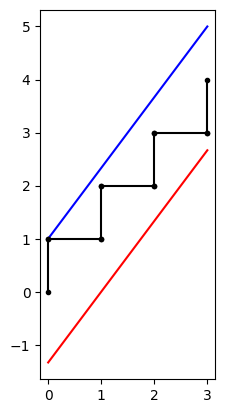

Word obtained for mu , 3  :  [1, 0, 1, 0, 1, 0, 1]


In [ ]:
res = D(4,3,3, cond = True) # change condition to true to see graphs

In [ ]:
def gensReveillesLine(gens, mu = False):
  '''gensReveillesLine function:
  input: gens( list of generators ), mu( being the seed applied on the function)
  output: list of words for each generator, plots for each word, output obtained using previous function D'''

  if not mu:
    mu = [0]*len(gens)

  # define n being the sum of generators
  n = sum(gens)

  # define a and b being the slope y = ax/b for each generator
  a = gens[:]
  b = [0]*len(gens)
  for i in range(0,len(gens)):
    b[i] = n - a[i]

  x=np.arange(0, n, 0.5)
  words = list()

  for i in range(0,len(gens)):
    print('\nfor Generator: ', gens[i])
    # Use function D to extract the word and the plot for each generator's slope
    word = D(a[i],b[i],mu[i])
    words.append(word)
    print('\n')
  return words


for Generator:  1


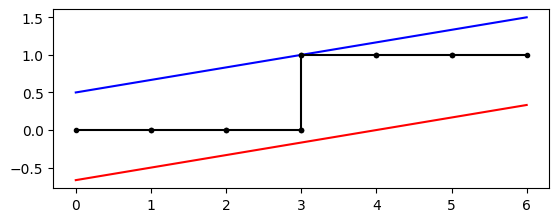

Word obtained for mu , 3  :  [0, 0, 0, 1, 0, 0, 0]



for Generator:  2


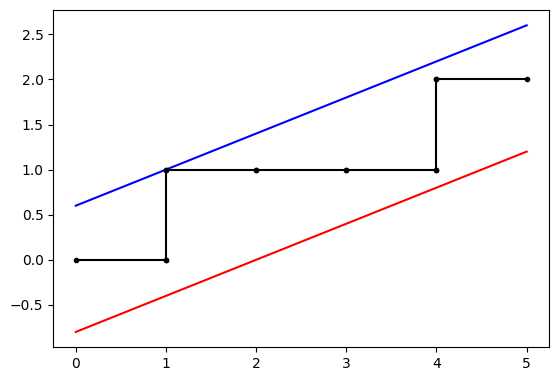

Word obtained for mu , 3  :  [0, 1, 0, 0, 0, 1, 0]



for Generator:  4


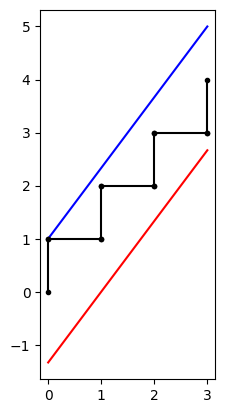

Word obtained for mu , 3  :  [1, 0, 1, 0, 1, 0, 1]




[[0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0], [1, 0, 1, 0, 1, 0, 1]]

In [ ]:
gensReveillesLine([1,2,4],[3,3,3])